### Loading of Libraries and Datasets ###

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 

In [2]:
house_df = pd.read_csv('realestate_prices.csv', encoding = 'ISO-8859-1')

##### Displaying Dataset #####

In [3]:
house_df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


##### Inspecting the Dataset #####

In [4]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
house_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
house_df.isnull().sum()[house_df.isnull().sum() > 0].sort_values(ascending=False)

Series([], dtype: int64)

### Perform Data Cleaning and Feature Engineering ###

In [10]:
selected_features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors', 'sqft_above', 'sqft_basement', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'yr_built', 
'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

X = house_df[selected_features]

In [11]:
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,1180,0,0,0,3,7,1180,1955,0,98178,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,2170,400,0,0,3,7,2170,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,770,0,0,0,3,6,770,1933,0,98028,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,1.0,1050,910,0,0,5,7,1050,1965,0,98136,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1.0,1680,0,0,0,3,8,1680,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,1530,0,0,0,3,8,1530,2009,0,98103,47.6993,-122.346,1530,1509
21609,4,2.50,2310,5813,2.0,2310,0,0,0,3,8,2310,2014,0,98146,47.5107,-122.362,1830,7200
21610,2,0.75,1020,1350,2.0,1020,0,0,0,3,7,1020,2009,0,98144,47.5944,-122.299,1020,2007
21611,3,2.50,1600,2388,2.0,1600,0,0,0,3,8,1600,2004,0,98027,47.5345,-122.069,1410,1287


In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
X_scaled[0]

array([0.09090909, 0.125     , 0.06716981, 0.00310751, 0.        ,
       0.09758772, 0.        , 0.        , 0.        , 0.5       ,
       0.5       , 0.09758772, 0.47826087, 0.        , 0.89393939,
       0.57149751, 0.21760797, 0.16193426, 0.00574235])

In [14]:
scaler.data_max_

array([ 3.300000e+01,  8.000000e+00,  1.354000e+04,  1.651359e+06,
        3.500000e+00,  9.410000e+03,  4.820000e+03,  1.000000e+00,
        4.000000e+00,  5.000000e+00,  1.300000e+01,  9.410000e+03,
        2.015000e+03,  2.015000e+03,  9.819900e+04,  4.777760e+01,
       -1.213150e+02,  6.210000e+03,  8.712000e+05])

In [15]:
scaler.data_min_

array([ 0.00000e+00,  0.00000e+00,  2.90000e+02,  5.20000e+02,
        1.00000e+00,  2.90000e+02,  0.00000e+00,  0.00000e+00,
        0.00000e+00,  1.00000e+00,  1.00000e+00,  2.90000e+02,
        1.90000e+03,  0.00000e+00,  9.80010e+04,  4.71559e+01,
       -1.22519e+02,  3.99000e+02,  6.51000e+02])

In [16]:
y = house_df['price']

In [17]:
y

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64

In [18]:
y = y.values.reshape(-1,1)
y_scaled = scaler.fit_transform(y)

In [19]:
y_scaled

array([[0.01926557],
       [0.06072131],
       [0.01377049],
       ...,
       [0.04289849],
       [0.04262295],
       [0.03278689]], shape=(21613, 1))

### Creating a Model ###

In [20]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
	

C:\Users\chino\anaconda3\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


##### Creating the Input Layer #####

In [21]:

model.add(Dense(units = 512, activation = "relu", input_dim = 19))


C:\Users\chino\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


##### Creating the Input Layer #####

In [22]:

model.add(Dense(units = 512, activation = "relu"))


##### Creating the Output Layer #####

In [23]:

model.add(Dense(units = 1, activation = "linear"))


##### Summarizing the Model #####

In [24]:

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │        10,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 273,409 (1.04 MB)

 Trainable params: 273,409 (1.04 MB)

 Non-trainable params: 0 (0.00 B)

##### Compiling the Model #####

In [25]:

model.compile(loss = "binary_crossentropy", metrics = ["mean_squared_error"])


### Training the Model ###

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size = 0.20)

In [27]:
X_train

array([[0.06060606, 0.125     , 0.04603774, ..., 0.35797342, 0.24281535,
        0.10833279],
       [0.15151515, 0.21875   , 0.13886792, ..., 0.25415282, 0.5594562 ,
        0.02128427],
       [0.12121212, 0.375     , 0.14037736, ..., 0.10880399, 0.34950955,
        0.06772853],
       ...,
       [0.15151515, 0.34375   , 0.17056604, ..., 0.28903654, 0.3529513 ,
        0.00812591],
       [0.09090909, 0.34375   , 0.10792453, ..., 0.28488372, 0.27551196,
        0.0472874 ],
       [0.06060606, 0.125     , 0.15018868, ..., 0.10797342, 0.33746343,
        0.0061444 ]], shape=(17290, 19))

In [28]:

history = model.fit(x = X_scaled, y = y_scaled, epochs=50, verbose=1, validation_data=(X_test, y_test)) #with validation metrics


Epoch 1/50
676/676 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.4468 - mean_squared_error: 0.0238 - val_loss: 0.2205 - val_mean_squared_error: 9.4368e-04
Epoch 2/50
676/676 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.2177 - mean_squared_error: 5.2048e-04 - val_loss: 0.2166 - val_mean_squared_error: 3.7917e-04
Epoch 3/50
676/676 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.2172 - mean_squared_error: 4.2340e-04 - val_loss: 0.2172 - val_mean_squared_error: 4.8534e-04
Epoch 4/50
676/676 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.2169 - mean_squared_error: 3.8453e-04 - val_loss: 0.2177 - val_mean_squared_error: 6.4147e-04
Epoch 5/50
676/676 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.2168 - mean_squared_error: 3.6068e-04 - val_loss: 0.2163 - val_mean_squared_error: 3.4358e-04
Epoch 6/50
676/676 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.2167 - mean_squared_error: 3.4419e-04 - val_loss: 0.2167 - val_mean_squared_error: 3.6146e-04
Epoch 7/50
676/676 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.2166 -

In [29]:
history.history.keys()

dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])

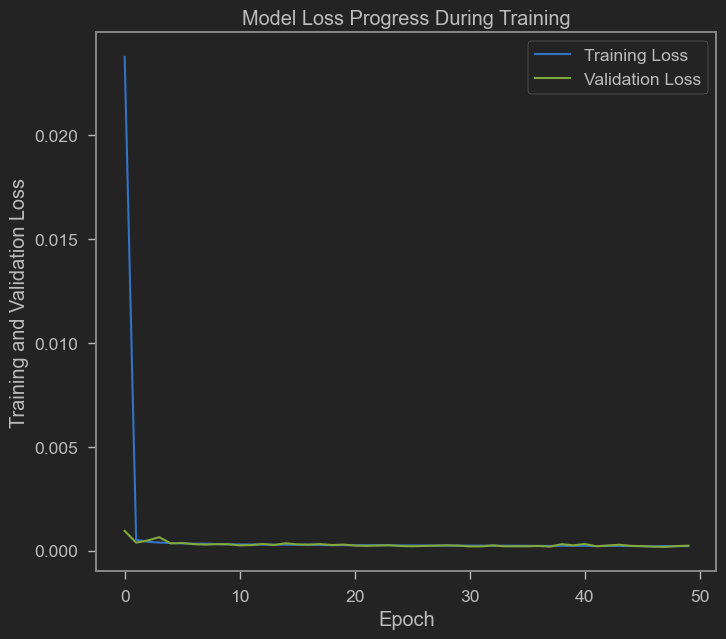

In [30]:
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training and Validation Loss')
plt.legend(['Training Loss', 'Validation Loss'])

In [31]:
baseline_mse = np.mean((y_test - y_scaled.mean())**2)


In [32]:
baseline_mse

np.float64(0.0020286760739294386)

In [36]:
# 'bedrooms','bathrooms','sqft_living','sqft_lot','floors', 'sqft_above', 'sqft_basement'
X_test_1 = np.array([[ 4, 3, 1960, 5000, 1, 2000, 3000, 1, 0, 4, 10, 1675, 1999, 2007, 98001, 47.843, -122.095, 950, 1200]])

scaler_1 = MinMaxScaler()
X_test_scaled_1 = scaler_1.fit_transform(X_test_1)

y_predict_1 = model.predict(X_test_scaled_1)

#This one reverted back the scaled output into dollars, etc.
y_predict_1 = scaler.inverse_transform(y_predict_1)
y_predict_1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


array([[123335.4]], dtype=float32)

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


Text(0, 0.5, 'True Values')

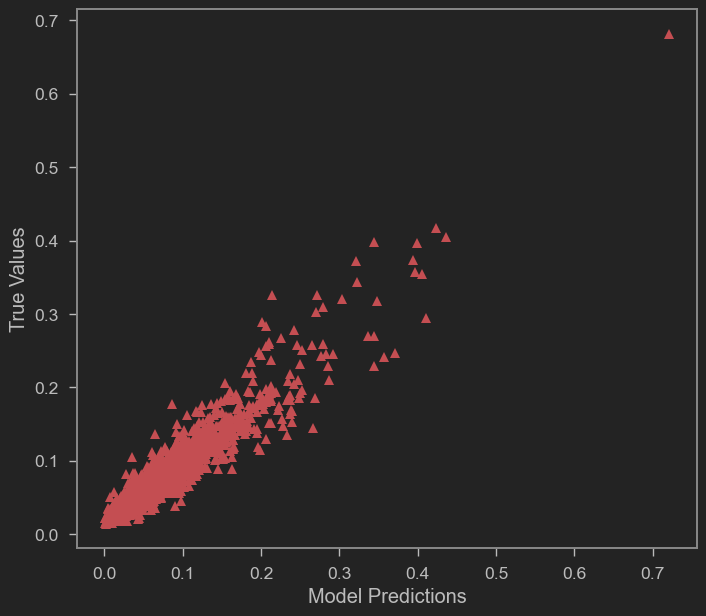

In [37]:
y_predict = model.predict(X_test)
plt.plot(y_test, y_predict, "^", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')


In [38]:
y_predict_orig = scaler.inverse_transform(y_predict)
y_test_orig = scaler.inverse_transform(y_test)


(0.0, 3000000.0)

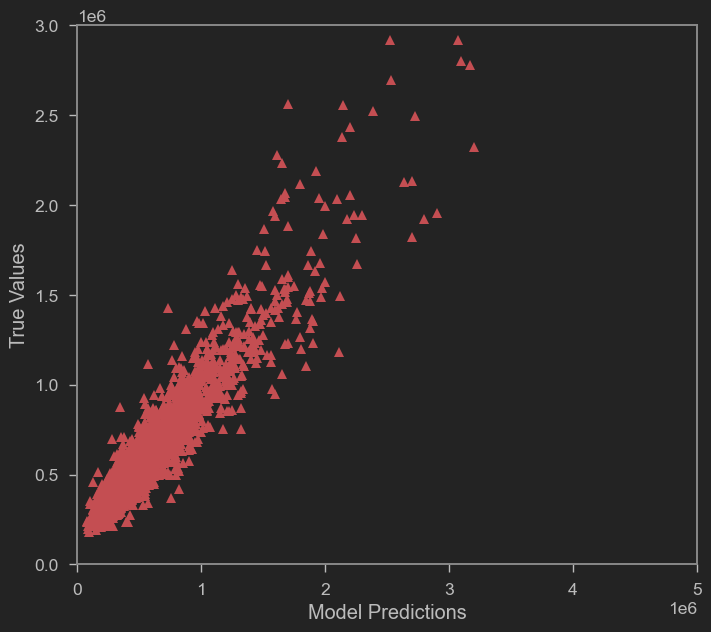

In [39]:
plt.plot(y_test_orig, y_predict_orig, "^", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')
plt.xlim(0, 5000000)
plt.ylim(0, 3000000)

In [42]:
k = X_test.shape[1]
n = len(X_test)
n

4323

In [43]:

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 


RMSE = 116306.552 
MSE = 13527214144.300438 
MAE = 82229.43647712815 
R2 = 0.8852925806840083 
Adjusted R2 = 0.8847860873149626
